# Customer Segmentation using E-Commerce Data
---



## Part 1: Cleaning Data 

### Importing necessary libraries, and preparing the data

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import customers_dataset 
sheet_url_customers = 'https://docs.google.com/spreadsheets/d/1wnsB5jsr5LND8FnxKMx_teEDbb9eNN5gxs8yN2qdYPE/edit#gid=1040484027'
sheet_url_trf_customers = sheet_url_customers.replace('/edit#gid=', '/export?format=csv&gid=')
df_customers = pd.read_csv(sheet_url_trf_customers)

# import orders_dataset 
sheet_url_orders = 'https://docs.google.com/spreadsheets/d/1EjucWwsp8WOr2DiezTnxgaZ5jCdeh9zlfNJul3x7sUI/edit#gid=829839458'
sheet_url_trf_orders = sheet_url_orders.replace('/edit#gid=', '/export?format=csv&gid=')
df_orders = pd.read_csv(sheet_url_trf_orders)

# import payments_dataset 
sheet_url_payments = 'https://docs.google.com/spreadsheets/d/1m_J-e_dIryVsxdMgTRwd86QdDsk99ELsZn10GTVNoD4/edit#gid=518968243'
sheet_url_trf_payments = sheet_url_payments.replace('/edit#gid=', '/export?format=csv&gid=')
df_payments = pd.read_csv(sheet_url_trf_payments)

### Cleaning df_customers dataset

In [ ]:
# overview of the customers dataset
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# inspecting and cleaning data on dataframe, copy before cleaning or manipulating the dataframe.
dfc = df_customers.copy()
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# drop unnecessary column
drop_column = ['customer_unique_id', 'customer_zip_code_prefix']
dfc.drop(drop_column, axis=1, inplace=True)
dfc

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,canoas,RS


In [ ]:
# check null value
dfc.isna().sum()

customer_id       0
customer_city     0
customer_state    0
dtype: int64

In [ ]:
# check duplicate value
dfc.duplicated(subset='customer_id').sum()

0

The customer dataset is quite clean, there is no columns/rows need to fill in, there's no duplicate in the data, and there's only 3 column needed, so we have to drop others. Then, we're good to go using the data to next step.

### Cleaning df_orders dataset

In [ ]:
# overview of the orders dataset
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [ ]:
# inspecting and cleaning data on dataframe, copy before cleaning or manipulating the dataframe.
dfo = df_orders.copy()
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# drop unnecessary column
drop_column_orders = dfo.columns[4:]
dfo.drop(drop_column_orders, axis=1, inplace=True)
dfo

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 9:54:05
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


In [ ]:
# check null value
dfo.isna().sum()

order_id                    0
customer_id                 0
order_status                0
order_purchase_timestamp    0
dtype: int64

In [ ]:
# check categorical data validity
print(dfo['order_status'].unique())
print(dfo['order_status'].value_counts(normalize=True)*100)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64


In [ ]:
# check duplicate value
dfo.duplicated(subset='order_id').sum()

0

In [ ]:
# change the dates to datetime format
dfo['order_purchase_timestamp'] =  dfo['order_purchase_timestamp'].apply(pd.to_datetime)

There is no duplicates in orders dataset. It has no blank values. The datetime column has been converted into datetime

### Cleaning df_payments dataset

In [ ]:
# overview of the order payments dataset
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# inspecting and cleaning data on dataframe, copy before cleaning or manipulating the dataframe.
dfp = df_payments.copy()
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# check null value
dfp.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
# check categorical data validity
print(dfp['payment_type'].unique())
print(dfp['payment_type'].value_counts(normalize=True)*100)

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: payment_type, dtype: float64


In [ ]:
# check descriptive stats of numerical data
dfp.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


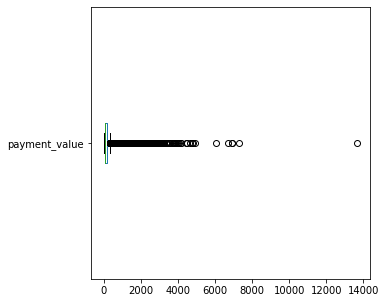

In [ ]:
# check outlier on payment_value
dfp.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(5,5),vert=False)

In [ ]:
# finding outliers using IQR method
Q1_dfp = dfp['payment_value'].quantile(0.25)
Q3_dfp = dfp['payment_value'].quantile(0.75)

IQR_dfp = Q3_dfp - Q1_dfp
print(("before remove outlier: ", dfp.shape))

lower_limit_dfp = Q1_dfp - (1.5 * IQR_dfp)
upper_limit_dfp = Q3_dfp + (1.5 * IQR_dfp)

# only show the price within the min and max value
filter_price_min_dfp = dfp['payment_value']>lower_limit_dfp
filter_price_max_dfp = dfp['payment_value']<upper_limit_dfp

dfp = dfp[(filter_price_min_dfp) & (filter_price_max_dfp)]
print(("after remove outlier: ", dfp.shape))

('before remove outlier: ', (103886, 5))
('after remove outlier: ', (95905, 5))


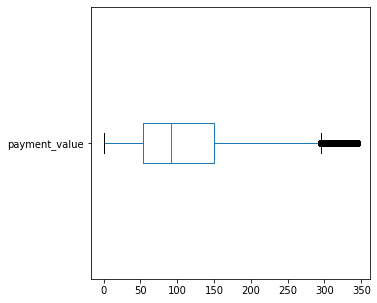

In [ ]:
# check the boxplot
dfp.boxplot(column=['payment_value'],fontsize=10,
           rot=0,grid=False,figsize=(5,5),vert=False)

The result shows that we have around 8k outliers in payment value. We have filtered the data. Before we're going to make any analysis, we have to make sure that this is worth to delete 7k data from 103.8k to 95.9k.

Idea: can we group the payment value based on payment type, and see whether there's any outliers or not in each type?

### Merging Dataset

In [ ]:
# merging dataset dfc dan dfo
dfco = dfc.merge(dfo, how='left', left_on='customer_id', right_on ='customer_id')

# merging dataset dfco dan dfp
all_df = dfco.merge(dfp, how='left', left_on='order_id', right_on = 'order_id')
all_df

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...
103739,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,credit_card,6.0,88.78
103740,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,credit_card,3.0,129.06
103741,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,credit_card,5.0,56.04
103742,56b18e2166679b8a959d72dd06da27f9,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,NaN,NaN,NaN,NaN


In [ ]:
print('total duplicate data = ', all_df.duplicated().sum())
print('total NaN data = ', all_df.isna().sum())

total duplicate data =  0
total NaN data =  customer_id                    0
customer_city                  0
customer_state                 0
order_id                       0
order_status                   0
order_purchase_timestamp       0
payment_sequential          7839
payment_type                7839
payment_installments        7839
payment_value               7839
dtype: int64


In [ ]:
# drop duplicates
all_df.drop_duplicates(inplace=True)

# dropna
all_df.dropna(axis=0, inplace=True)
print('jumlah row dari data adalah {}, dan jumlah kolom yang digunakan adalah {}.'.format(all_df.shape[0],
                                                                                          all_df.shape[-1]))

jumlah row dari data adalah 95905, dan jumlah kolom yang digunakan adalah 10.


In [ ]:
# null check
all_df.isna().sum()

customer_id                 0
customer_city               0
customer_state              0
order_id                    0
order_status                0
order_purchase_timestamp    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value               0
dtype: int64

## Part 2: EDA & Visualization

### Descriptive Statistics

In [ ]:
# let's see the overview of this merged dataset
all_df.head()

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93120 entries, 0 to 103743
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               93120 non-null  object        
 1   customer_city             93120 non-null  object        
 2   customer_state            93120 non-null  object        
 3   order_id                  93120 non-null  object        
 4   order_status              93120 non-null  object        
 5   order_purchase_timestamp  93120 non-null  datetime64[ns]
 6   payment_sequential        93120 non-null  float64       
 7   payment_type              93120 non-null  object        
 8   payment_installments      93120 non-null  float64       
 9   payment_value             93120 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.8+ MB


In [ ]:
# let's see the order_status of the dataset
all_df['order_status'].value_counts()

delivered      93120
shipped         1073
canceled         584
unavailable      579
invoiced         277
processing       265
created            5
approved           2
Name: order_status, dtype: int64

In [ ]:
# We can say the actual revenue that Gustavo get come from payment_value which order_status is delivered, so we're going to only preserved row with order_status = delivered
all_df = all_df[all_df['order_status'] == 'delivered']
all_df

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...
103738,7fe2e80252a9ea476f950ae8f85b0f8f,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,1.0,credit_card,1.0,75.88
103739,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,credit_card,6.0,88.78
103740,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,credit_card,3.0,129.06
103741,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,credit_card,5.0,56.04


In [ ]:
# descriptive stats on numerical data
all_df_stats = all_df.describe()

#### Adding kurtosis, skewness, and variance rows

In [ ]:
# add another desc stats like kurtosis, skewness, and variance

all_df_stats.loc['kurtosis'] = all_df[['payment_sequential','payment_installments','payment_value']].kurt()
all_df_stats.loc['skewness'] = all_df[['payment_sequential','payment_installments','payment_value']].skew()
all_df_stats.loc['variance'] = all_df[['payment_sequential','payment_installments','payment_value']].var()
all_df_stats

,payment_sequential,payment_installments,payment_value
count,93120.000000,93120.000000,93120.000000
mean,1.094813,2.629199,110.013383
std,0.677910,2.451207,72.678652
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.210000
75%,1.000000,3.000000,150.470000
max,26.000000,24.000000,344.340000
kurtosis,298.149790,3.074128,0.496109
skewness,14.558454,1.792502,0.998377


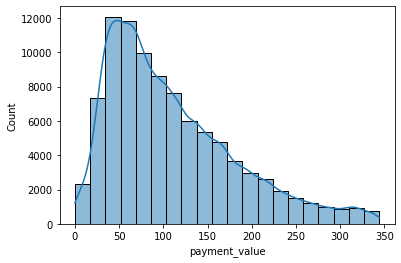

In [ ]:
# distribution of payment_value
sns.histplot(data=all_df, x='payment_value', bins=20, kde=True)

**INSIGHT**

---

From the descriptive stats of the payment_value column above, we can see that the total purchase(or payment) made to Gustavo startup is 93120 times.
The minimum payment is 0, it is derived from voucher payment type, while the maximum payment he got is 344.34. People on average spend money to buy goods from his store around 110.01.

From the distribution of payment value, we can see that the it is positive skewness, means that most payment made in 50 to 100 usd, while less in much higher payment value.

In [ ]:
# descriptive stats on categorical data
all_df[['customer_city',	'customer_state', 'order_status',	'payment_type']].describe()

,customer_city,customer_state,order_status,payment_type
count,93120,93120,93120,93120
unique,3965,27,1,4
top,sao paulo,SP,delivered,credit_card
freq,14742,39716,93120,68327


**INSIGHT**

---

Based on categorical data, we can see that the top spender who bought Gustavo's products came from Sau Paulo. The most payment type used in the website is credit card, which used **68327 times**.

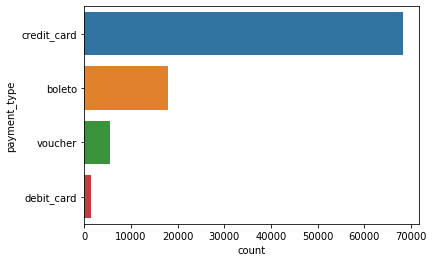

In [ ]:
# payment yang paling banyak digunakan
sns.countplot(y='payment_type', orient='h', data=all_df, order=all_df['payment_type'].value_counts().index) 

In [ ]:
# find earliest date and latest date on the dataset
print(all_df['order_purchase_timestamp'].min())
print(all_df['order_purchase_timestamp'].max())

2016-10-03 09:44:50
2018-08-29 15:00:37


In [ ]:
# copy data to new variable, because we're going to parsing the datetime several time after this
all_df_month = all_df.copy()
all_df_day = all_df.copy()

In [ ]:
# change the datetime format on column 'order_purchase_timestamp' to year and month (%Y-%m)
all_df_month['order_purchase_timestamp'] = all_df_month['order_purchase_timestamp'].dt.strftime('%Y-%m')

# change the datetime format on column 'order_purchase_timestamp' to day (%A)
all_df_day['order_purchase_timestamp'] = all_df_day['order_purchase_timestamp'].dt.strftime('%A')

# print unique
print(all_df_month['order_purchase_timestamp'].unique())
print(all_df_day['order_purchase_timestamp'].unique())

['2017-05' '2018-01' '2018-05' '2018-03' '2018-07' '2017-09' '2018-02'
 '2017-11' '2018-04' '2018-08' '2018-06' '2017-08' '2017-10' '2017-04'
 '2017-06' '2017-12' '2017-01' '2017-07' '2017-03' '2017-02' '2016-10'
 '2016-12']
['Tuesday' 'Friday' 'Saturday' 'Sunday' 'Thursday' 'Monday' 'Wednesday']


In [ ]:
# sort the day on column 'order_purchase_timestamp'.
all_df_day['order_purchase_timestamp'] = pd.Categorical(all_df_day['order_purchase_timestamp'], 
    categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)


In [ ]:
# count order based on month, and sort ascending
all_df_group_month = all_df_month.groupby('order_purchase_timestamp')['order_id'].count().reset_index().sort_values(by='order_purchase_timestamp') #1st question

# group order based on day
all_df_group_day = all_df_day.groupby('order_purchase_timestamp')['order_id'].count().reset_index() #2nd question

# group order based on payment, and calculate the percentage
all_df_group_payment = all_df.groupby('payment_type')['order_id'].count().reset_index()
all_df_group_payment['percentage'] = 100 * all_df_group_payment['order_id'] / all_df_group_payment['order_id'].sum() #3rd question

In [ ]:
# rename column 
all_df_group_month.columns = ['month_year', 'total_order']
all_df_group_day.columns = ['day', 'total_order']
all_df_group_payment.rename(columns={'order_id':'total_order'}, inplace=True)

In [ ]:
all_df_group_day

,day,total_order
0,Monday,15100
1,Tuesday,15012
2,Wednesday,14543
3,Thursday,13854
4,Friday,13188
5,Saturday,10165
6,Sunday,11258


In [ ]:
# check the grouped data by month
all_df_group_month

,month_year,total_order
0,2016-10,251
1,2016-12,1
2,2017-01,710
3,2017-02,1615
4,2017-03,2494
5,2017-04,2231
6,2017-05,3503
7,2017-06,3094
8,2017-07,3884
9,2017-08,4077


In [ ]:
# check the grouped data by day
all_df_group_day

,day,total_order
0,Monday,15100
1,Tuesday,15012
2,Wednesday,14543
3,Thursday,13854
4,Friday,13188
5,Saturday,10165
6,Sunday,11258


In [ ]:
# check the grouped data payment type and percentage of orders per payment type
all_df_group_payment = all_df_group_payment.sort_values(by='percentage', ascending=False)
all_df_group_payment

,payment_type,total_order,percentage
1,credit_card,68327,73.375215
0,boleto,17965,19.292311
3,voucher,5422,5.822595
2,debit_card,1406,1.509880


#### Number of orders per month

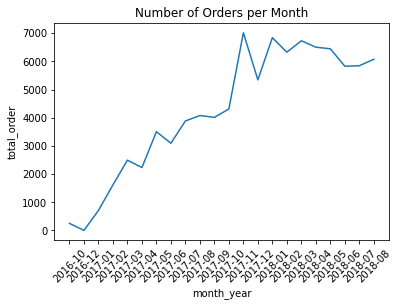

In [ ]:
# number of orders per month
# plot the total order per month using lineplot 
plt.xticks(rotation=45)
plt.title('Number of Orders per Month')
sns.lineplot(x='month_year', y='total_order', data=all_df_group_month)

#### Daily orders trend

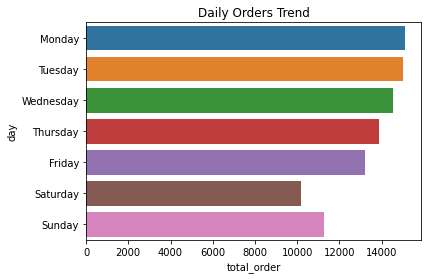

In [ ]:
# daily orders trend
# plot the total order on each day, and find on which day is the busiest day 
plt.title('Daily Orders Trend')
sns.barplot(x='total_order', y='day', orient='h', data=all_df_group_day)

#### Percentage of orders per payment type

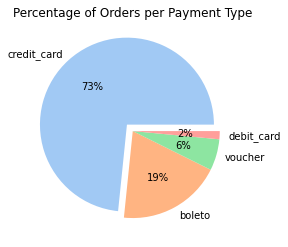

In [ ]:
# percentage of orders per payment type
# group order based on payment

explode = [0.1, 0, 0, 0]
palette_color = sns.color_palette('pastel')
plt.pie(x=all_df_group_payment['total_order'], labels=all_df_group_payment['payment_type'], colors=palette_color,
        explode=explode, autopct='%.0f%%')
plt.title('Percentage of Orders per Payment Type')
plt.show()

#### Insight

**Number of orders per month**

---



Based on number of orders per month, we can see that the data starts from October 2016 until August 2018. Gustavo e-commerce hit its highest sales one year after commence, which is on November 2017. The lowest sales we can also see from the graph is on the early months. The question brief said that the sales related to Covid, but in reality the sales data that we have is before Covid, so we can't infer what affected the boost of the sales starting on November 2017.

**Daily orders trend (which day of week is the busiest)**


---

At first, I have a hunch that the busiest day would be on the weekend, so it's either Saturday or Sunday. But the data tell the opposite. Weekend apparently are the days when the total order made is less. The total order on Saturday and Sunday are only around 10k and 11k, respectively. While Monday and Tuesday are the day when order reach its peak, have total order around 15k each. 

**Percentage of orders per payment type**


---

People prefer to pay products on Gustavo's e-commerce using credit card. Around 73% of total buyers choose this type of payment, while debit card spender only consist of 2% of total buyers.


#### Top and bottom 5 value payment per customer state

In [ ]:
# create top and bottom 5 of value payment per customer state
# create top 5 of order per customer state
all_df_sum_cusstate = all_df.groupby('customer_state')['payment_value'].sum().reset_index().sort_values(by='payment_value', ascending=False)
all_df_count_cusstate = all_df.groupby('customer_state')['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
top_5_payment = all_df_sum_cusstate.head(5)
bottom_5_payment = all_df_sum_cusstate.tail(5)
top_5_customer = all_df_count_cusstate.head(5)

In [ ]:
# check dataframe
all_df_sum_cusstate

,customer_state,payment_value
25,SP,4055529.78
18,RJ,1365253.64
10,MG,1236235.22
22,RS,587108.46
17,PR,516353.53
23,SC,388672.93
4,BA,367097.60
6,DF,223952.50
7,ES,218905.13
8,GO,216611.74


In [ ]:
# check dataframe
all_df_count_cusstate

,customer_state,order_id
25,SP,39716
18,RJ,11997
10,MG,10942
22,RS,5118
17,PR,4736
23,SC,3364
4,BA,3175
6,DF,1971
7,ES,1925
8,GO,1870


Text(0.5, 1.0, 'top 5 total of Order ID per State')

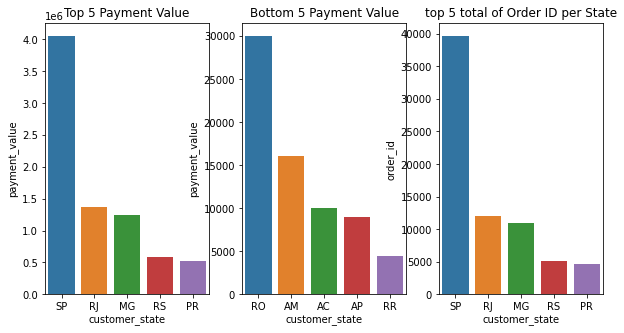

In [ ]:
# create top and bottom 5 barplot

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))

sns.barplot(ax=axes[0], x='customer_state', y='payment_value', data=top_5_payment)
axes[0].set_title('Top 5 Payment Value')

sns.barplot(ax=axes[1], x='customer_state', y='payment_value', data=bottom_5_payment)
axes[1].set_title('Bottom 5 Payment Value')

sns.barplot(ax=axes[2], x='customer_state', y='order_id', data=top_5_customer)
axes[2].set_title('top 5 total of Order ID per State')

**INSIGHT**

---

Based on graph, we can see both of total number of order id and total payment value dominated by customer from Sao Paulo. In total, customer Sau Paulo spend 4 million usd, and become top spender. The second highest is customer from RJ (Rio de Janeiro), only 1.5 million usd.

The lowest contribution is derived from customer from state RR. 

Based on total order, customer from Sao Paulo unsurprisingly also become the highest, with the total number of order around 40k.

## Part 3: Customer Segmentation using Cluster Analysis

### Importing necessary libraries, and preparing the data

In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import cluster

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 6.69MB/s]


In [ ]:
# copy dataset before doing analysis
advanced = all_df.copy()

In [ ]:
# check overview of dataset
advanced

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25
...,...,...,...,...,...,...,...,...,...,...
103738,7fe2e80252a9ea476f950ae8f85b0f8f,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,1.0,credit_card,1.0,75.88
103739,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,credit_card,6.0,88.78
103740,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,credit_card,3.0,129.06
103741,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,credit_card,5.0,56.04


In [ ]:
# check the total rows and columns in dataset
advanced.shape

(93120, 10)

In [ ]:
# check summary of numerical column
advanced.describe()

,payment_sequential,payment_installments,payment_value
count,93120.000000,93120.000000,93120.000000
mean,1.094813,2.629199,110.013383
std,0.677910,2.451207,72.678652
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.210000
75%,1.000000,3.000000,150.470000
max,26.000000,24.000000,344.340000


In [ ]:
# check summary of categorical column
advanced.describe(include='object')

,customer_id,customer_city,customer_state,order_id,order_status,payment_type
count,93120,93120,93120,93120,93120,93120
unique,88975,3965,27,88975,1,4
top,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,credit_card
freq,26,14742,39716,26,93120,68327


In [ ]:
# check overview of the top customer
advanced[advanced['customer_id']=='92cd3ec6e2d643d4ebd0e3d6238f69e2']

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value
62126,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,19.0,voucher,1.0,1.68
62127,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,1.0,credit_card,1.0,2.20
62128,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,14.0,voucher,1.0,0.97
62129,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,15.0,voucher,1.0,1.11
62130,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,6.0,voucher,1.0,2.26
62131,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,26.0,voucher,1.0,23.10
62132,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,2.0,voucher,1.0,1.45
62133,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,25.0,voucher,1.0,1.53
62134,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,5.0,voucher,1.0,2.69
62135,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,ccf804e764ed5650cd8759557269dc13,delivered,2017-06-07 12:05:10,3.0,voucher,1.0,1.15


### Creating new column using functions, that match characteristics of each customers.

In [ ]:
# create new column named payment_installment_cat based on payment_installments column
# if the payment_installments value <= 1, 'no debt-debt club'.
# elif the payment_installments value 2 - 6, 'pinjol friendly',
# elif the payment_installments value 7 - 12, 'medium term',
# elif the payment_installments value > 12, 'long commitment'.

def payment_installment(advanced):
    if (advanced['payment_installments'] <= 1):
        return 'no debt-debt club'
    elif (advanced['payment_installments'] > 1) and (advanced['payment_installments'] <= 6):
        return 'pinjol friendly'
    elif (advanced['payment_installments'] > 6) and (advanced['payment_installments'] <= 12):
        return 'medium term'
    elif (advanced['payment_installments'] > 12):
        return 'long commitment'
    
advanced['payment_installments_cat'] = advanced.apply(payment_installment, axis = 1)

In [ ]:
advanced['payment_installments_cat'].value_counts()

no debt-debt club    48983
pinjol friendly      35643
medium term           8380
long commitment        114
Name: payment_installments_cat, dtype: int64

Data Overview:
* There are 93.120 order with 88.975 unique customer in the clean dataset.
* The average of money spent by customer in Gustavo's e-commerce is 110.01 USD, with median payment around 92.21 USD.
* Most of customers came from Sao Paulo.
* Most of payment type used by the customer is credit card.


In [ ]:
# create copy dataframe before doing cluster analysis
df_cluster = advanced.copy()  

In [ ]:
# cluster analysis only need numerical value, so we drop categorical values, and preserve only numerical column that explained the relationship within the data.
# we drop payment_sequential eventhough the column is numeric, bcs we think that the column has no meaning with the behaviour of customer that we study.
# drop unnecessary column
df_cluster = df_cluster[['customer_state', 'payment_type', 'payment_installments', 'payment_value']]
df_cluster

,customer_state,payment_type,payment_installments,payment_value
0,SP,credit_card,2.0,146.87
1,SP,credit_card,8.0,335.48
2,SP,credit_card,7.0,157.73
3,SP,credit_card,1.0,173.30
4,SP,credit_card,8.0,252.25
...,...,...,...,...
103738,MG,credit_card,1.0,75.88
103739,SP,credit_card,6.0,88.78
103740,SP,credit_card,3.0,129.06
103741,CE,credit_card,5.0,56.04


In [ ]:
# create one hot encoding

#categorical data
categorical_cols = ['customer_state', 'payment_type']

dum_df_cluster = pd.get_dummies(df_cluster, columns = categorical_cols)
df_cluster = dum_df_cluster.copy()
df_cluster

,payment_installments,payment_value,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,...,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,2.0,146.87,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,8.0,335.48,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,7.0,157.73,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1.0,173.30,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,8.0,252.25,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103738,1.0,75.88,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
103739,6.0,88.78,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
103740,3.0,129.06,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
103741,5.0,56.04,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Clustering Analysis

We are going to use all 4 columns (customer state, payment type, payment installments, and payment value) to find where our data clustered, and separate our customer in several cluster.

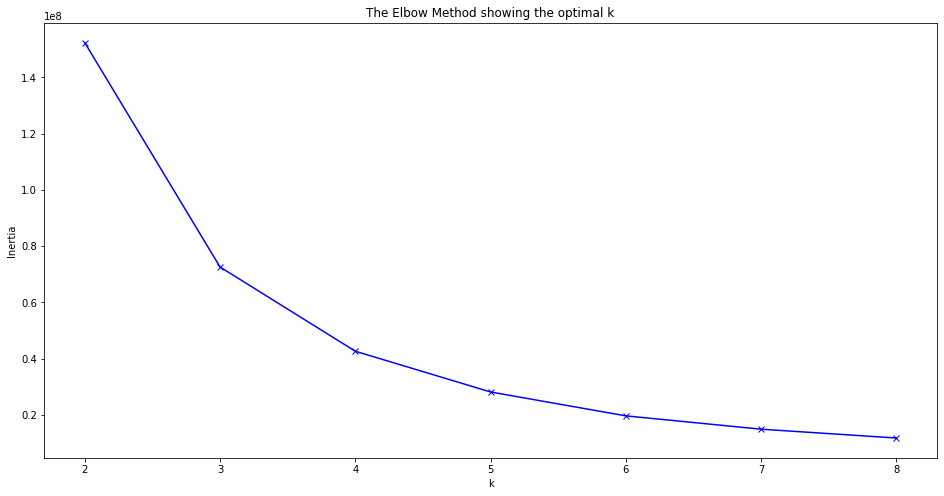

In [ ]:
# visualizing the relationship between payment value, payment installment, payment type, and customer state

# using all variable

# choosing k value, using elbow method
distortions = []
K = range(2,9)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cluster)
    distortions.append(kmeanModel.inertia_)

# setting figure
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# choosing number of clusters
kmeanModel = cluster.KMeans(n_clusters=4)
kmeanModel.fit(df_cluster)

# put label
label = kmeanModel.labels_

# add cluster to dataframe
advanced['cluster'] = label

advanced

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,payment_sequential,payment_type,payment_installments,payment_value,payment_installments_cat,cluster
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1.0,credit_card,2.0,146.87,pinjol friendly,1
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1.0,credit_card,8.0,335.48,medium term,2
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1.0,credit_card,7.0,157.73,medium term,1
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1.0,credit_card,1.0,173.30,no debt-debt club,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1.0,credit_card,8.0,252.25,medium term,2
...,...,...,...,...,...,...,...,...,...,...,...,...
103738,7fe2e80252a9ea476f950ae8f85b0f8f,divinopolis,MG,c9aea907527f5d4f5fb44955c18a79fb,delivered,2017-12-17 23:13:41,1.0,credit_card,1.0,75.88,no debt-debt club,0
103739,17ddf5dd5d51696bb3d7c6291687be6f,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1.0,credit_card,6.0,88.78,pinjol friendly,3
103740,e7b71a9017aa05c9a7fd292d714858e8,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1.0,credit_card,3.0,129.06,pinjol friendly,3
103741,5e28dfe12db7fb50a4b2f691faecea5e,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1.0,credit_card,5.0,56.04,pinjol friendly,0


In [ ]:
# aggregate payment value data by cluster
advanced.groupby('cluster')['payment_value'].agg(['count','mean','median','max','min'])

,total,mean,median,max,min
cluster,,,,,
0,38318,46.973324,47.84,76.52,0.00
1,18240,177.128408,173.60,225.99,141.51
2,7901,274.972215,268.84,344.34,226.04
3,28661,106.107420,104.73,141.58,76.44


In [ ]:
# aggregate payment value data by cluster, payment_type, and payment_installments_cat
advanced.groupby(['cluster','payment_type','payment_installments_cat'])['payment_value'].agg(['count','mean','median','max','min']).sort_values(by=['cluster','count'], ascending=True)

count        mean   median  \
cluster payment_type payment_installments_cat                               
0       credit_card  medium term                 359   73.032061   73.340   
        debit_card   no debt-debt club           636   47.781934   46.555   
        voucher      no debt-debt club          4091   29.615031   25.000   
        boleto       no debt-debt club          7776   49.600837   49.535   
        credit_card  pinjol friendly           11386   52.907541   54.100   
                     no debt-debt club         14070   45.064644   45.130   
1       credit_card  long commitment              63  177.073968  173.290   
        debit_card   no debt-debt club           251  177.705498  174.160   
        voucher      no debt-debt club           315  177.914603  175.490   
        credit_card  no debt-debt club          2463  174.524633  170.280   
                     medium term                3101  180.846301  179.190   
        boleto       no debt-debt club          3249  176.294503  172.520   
        credit_card  pinjol friendly            8798  176.810631  173.255   
2       credit_card  long commitment              38  277.793947  273.615   
        debit_card   no debt-debt club           102  273.716863  269.250   
        voucher      no debt-debt club           112  269.712054  253.580   
        credit_card  no debt-debt club           832  274.410300  268.340   
        boleto       no debt-debt club          1337  274.435669  267.790   
        credit_card  medium term                1901  276.402593  271.580   
                     pinjol friendly            3579  274.713954  268.450   
3       credit_card  long commitment              13  135.566923  135.520   
        debit_card   no debt-debt club           417  105.225156  102.350   
        voucher      no debt-debt club           904  102.199226  100.000   
        credit_card  medium term                3019  106.300119  105.280   
        boleto       no debt-debt club          5603  105.936682  104.690   
        credit_card  no debt-debt club          6825  102.846399   98.800   
                     pinjol friendly           11880  108.308539  107.780   

                                                  max     min  
cluster payment_type payment_installments_cat                  
0       credit_card  medium term                76.39   37.58  
        debit_card   no debt-debt club          76.39   13.38  
        voucher      no debt-debt club          76.49    0.00  
        boleto       no debt-debt club          76.51   11.62  
        credit_card  pinjol friendly            76.51   20.03  
                     no debt-debt club          76.52    0.01  
1       credit_card  long commitment           225.06  142.11  
        debit_card   no debt-debt club         225.70  141.62  
        voucher      no debt-debt club         225.71  141.72  
        credit_card  no debt-debt club         225.96  141.60  
                     medium term               225.96  141.51  
        boleto       no debt-debt club         225.97  141.63  
        credit_card  pinjol friendly           225.99  141.60  
2       credit_card  long commitment           338.77  228.71  
        debit_card   no debt-debt club         340.07  226.06  
        voucher      no debt-debt club         341.02  226.88  
        credit_card  no debt-debt club         343.91  226.11  
        boleto       no debt-debt club         344.33  226.04  
        credit_card  medium term               344.32  226.12  
                     pinjol friendly           344.34  226.05  
3       credit_card  long commitment           139.98  130.57  
        debit_card   no debt-debt club         140.91   76.57  
        voucher      no debt-debt club         141.13   76.66  
        credit_card  medium term               141.50   76.44  
        boleto       no debt-debt club         141.58   76.55  
        credit_card  no debt-debt club         141.53   76.54  
                     

In [ ]:
# aggregate payment value data by cluster, payment_type, payment_installments_cat, and customer_state
advanced.groupby(['cluster','payment_type','payment_installments_cat','customer_state'])['payment_value'].agg(['count','mean','median','max','min']).sort_values(by=['cluster','count'], ascending=False)

count  \
cluster payment_type payment_installments_cat customer_state          
3       credit_card  pinjol friendly          SP               4769   
                     no debt-debt club        SP               3088   
        boleto       no debt-debt club        SP               2239   
        credit_card  pinjol friendly          RJ               1631   
                                              MG               1527   
...                                                             ...   
0       credit_card  medium term              SE                  1   
                     no debt-debt club        AP                  1   
        debit_card   no debt-debt club        AM                  1   
                                              RN                  1   
                                              SE                  1   

                                                                    mean  \
cluster payment_type payment_installments_cat customer_state               
3       credit_card  pinjol friendly          SP              107.755022   
                     no debt-debt club        SP              102.573358   
        boleto       no debt-debt club        SP              105.880179   
        credit_card  pinjol friendly          RJ              108.447039   
                                              MG              108.283032   
...                                                                  ...   
0       credit_card  medium term              SE               70.860000   
                     no debt-debt club        AP               42.100000   
        debit_card   no debt-debt club        AM               51.140000   
                                              RN               43.750000   
                                              SE               70.050000   

                                                               median     max  \
cluster payment_type payment_installments_cat customer_state                    
3       credit_card  pinjol friendly          SP              106.950  141.58   
                     no debt-debt club        SP               98.525  141.53   
        boleto       no debt-debt club        SP              103.550  141.53   
        credit_card  pinjol friendly          RJ              107.780  141.58   
                                              MG              107.780  141.48   
...                                                               ...     ...   
0       credit_card  medium term              SE               70.860   70.86   
                     no debt-debt club        AP               42.100   42.10   
        debit_card   no debt-debt club        AM               51.140   51.14   
                                              RN               43.750   43.75   
                                              SE               70.050   70.05   

                                                                min  
cluster payment_type payment_installments_cat customer_state         
3       credit_card  pinjol friendly          SP              76.50  
                     no debt-debt club        SP              76.54  
        boleto       no debt-debt club        SP              76.55  
        credit_card  pinjol friendly          RJ              76.55  
                                              MG              76.51  
...                                                             ...  
0       credit_card  medium term              SE              70.86  
                     no debt-debt club        AP              42.10  
        debit_card   no debt-debt club        AM              51.14  
                                              RN              43.75  
                                              SE              70.05  

[619 rows x 5 columns]

In [ ]:
# find total order per cluster
advanced.groupby('cluster')['order_id'].agg(['count'])

,count
cluster,
0,38318
1,18240
2,7901
3,28661


### Summary

The distribution of data on each cluster quite good (no cluster with small count).

Cluster characteristic:

**0: team lunas**

characteristics:

*   Average spending is around $46.91.
*   Most of the customers using credit card without installments.

---

**1: team cc & offline payment**

characteristics:

*   Average spending is around $176.84.
*   Most of the customers using credit card with <= 6 months installments. Beside credit card, they are also using _boleto_ (some kind of offline payment, common in Brazil, in Indonesia very similar with pay in Indomaret/Alfamart). 

---

**2: team buy now, pay later**

characteristics:

*   Average spending is around $274.67.
*   Most of the customers pay using credit card within 1 year installments (medium term). 

---

**3: team cc short term**

characteristics:

*   Average spending is around $105.92.
*   Most of the customers pay using credit card with <= 6 months installments, meaning that they are _pinjol friendly_ 🤑.

### Recommendation

**General Recommendation**

Most of the customers on every cluster based on Sao Paulo. In order to re-engage them to repurchase in our e-commerce, or to attract new customer based on that city, we can give free shipping cost to Sao Paulo customer.

**Spesific Recommendation**

**Cluster 0**

* Cluster 0 named as "*team lunas*", because they tend to purchase goods directly with credit card without installments.
* They spend \$47 on average, with minimum purchase is \$0 (they purchase something and pay using voucher or gift card) and maximum purchase $76.
* We can make bundling promotions on the items they usually buy, and expect their spending behaviour will improve.


**Cluster 1**
* Cluster 1 named as "*team cc & offline payment*".
* They spend \$176 on average, with minimum purchase is \$141 and maximum purchase $226.
* This is our second biggest spender in our e-commerce. In order to target this cluster, we have to improve our *boleto payment* more seamless, because this cluster rely on credit card and boleto.
* We can also give specialized discount if people pay the items using boleto.


**Cluster 2**
* Cluster 2 named as "*team buy now pay later*".
* They spend \$274 on average, with minimum purchase is \$226 and maximum purchase $344.
* This is our highest spender in our e-commerce. In order to target this cluster, we have to give more incentive for people paying with credit card + installments.
* We can partner with bank, and give various bank-related discounts. We can also give 0% interest for the installments.


**Cluster 3**
* Cluster 3 named as "*team cc short term*".
* They spend \$106 on average, with minimum purchase is \$76 and maximum purchase $141.
* This cluster behaviour also pay for items in our e-commerce using credit card, but they tend to use short installments (<6 months).
* We can use similar strategy to attract customer from this cluster with strategy from cluster 2. We can give incentive by offering more bank-related discounts, and give 0% interest for the installments.


### Rationale

* Based on elbow method, the most suitable cluster would be either 4 or 5. I have assesed both of the options, and choose 4 cluster as the segmentation of the e-commerce customer, because we can still differentiate if there's only 4 clusters. When we go to more than 4 clusters, the differentiation within each cluster is vague.

* Beside elbow method, we can also find the number of cluster by assessing the value of silhoutte analysis. Based on this analysis, the value is decreasing. When the cluster is 2, the value is 0.61, and decreasing substantially to 0.42 while the cluster is 8.

* So, based on the elbow method, and the convenience to distinguish the customer on each cluster, we choose 4 clusters.

For n_clusters = 2 The average silhouette_score is : 0.6139012873219261
For n_clusters = 3 The average silhouette_score is : 0.5578855722644278
For n_clusters = 4 The average silhouette_score is : 0.5190848510174552
For n_clusters = 5 The average silhouette_score is : 0.484399960838132
For n_clusters = 6 The average silhouette_score is : 0.46568430724149273
For n_clusters = 7 The average silhouette_score is : 0.44502037198258926
For n_clusters = 8 The average silhouette_score is : 0.4287835618490517


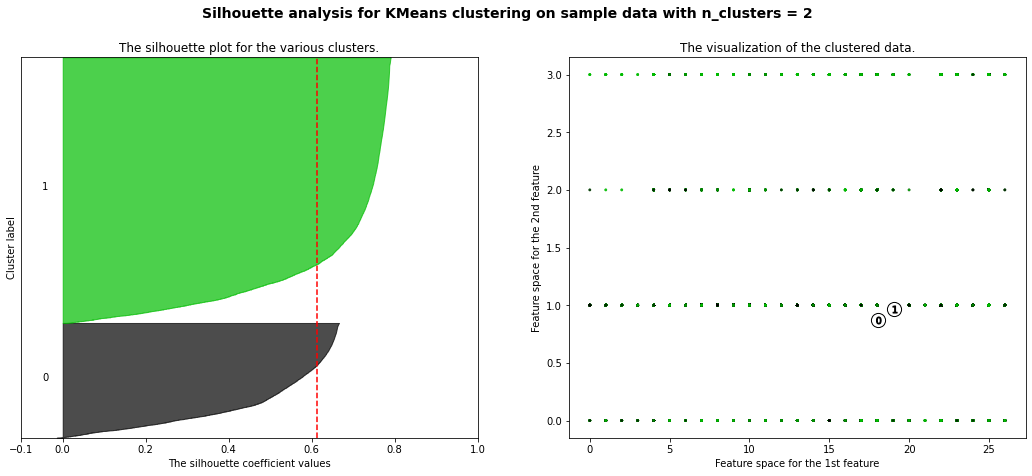

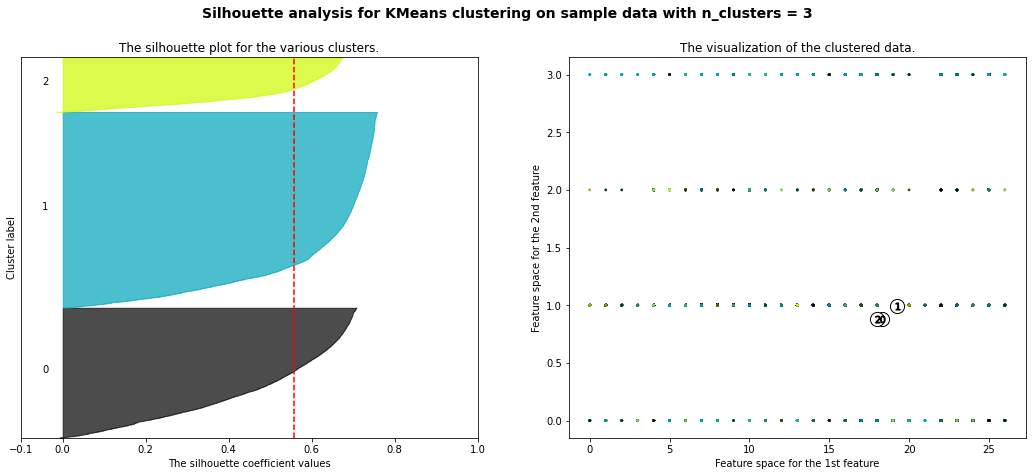

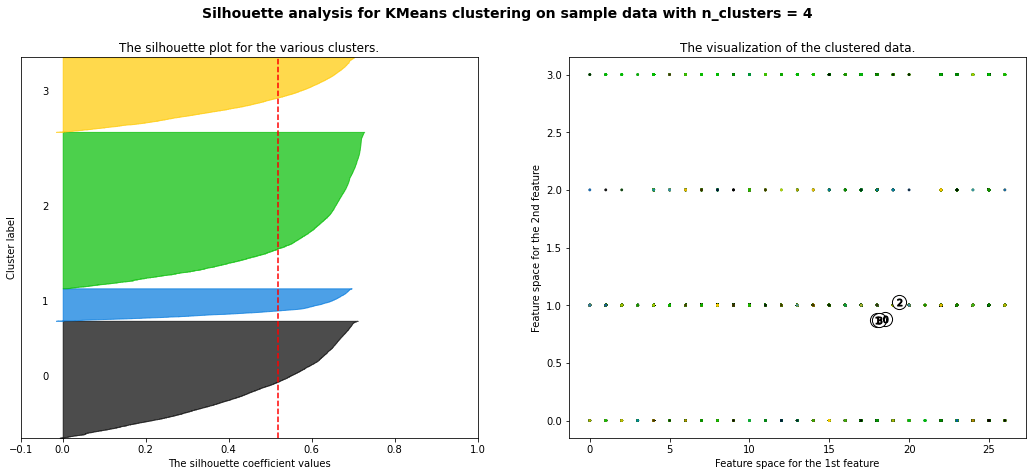

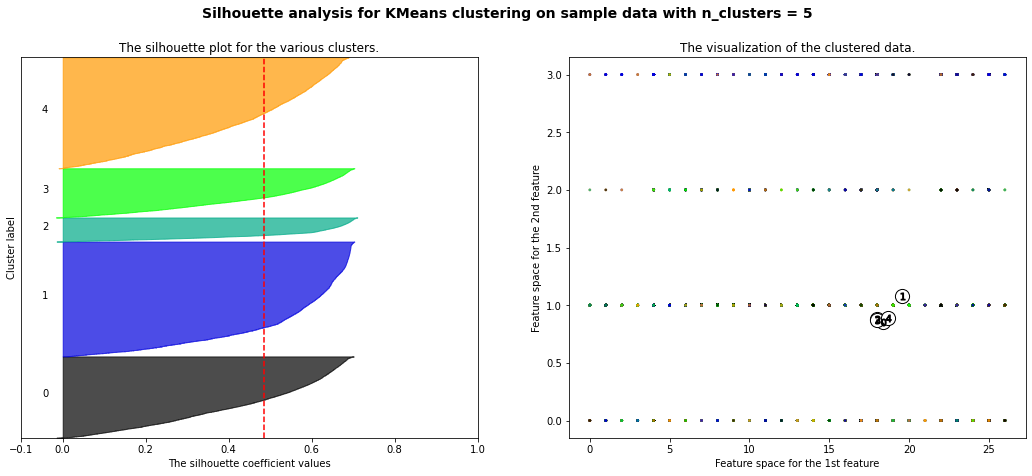

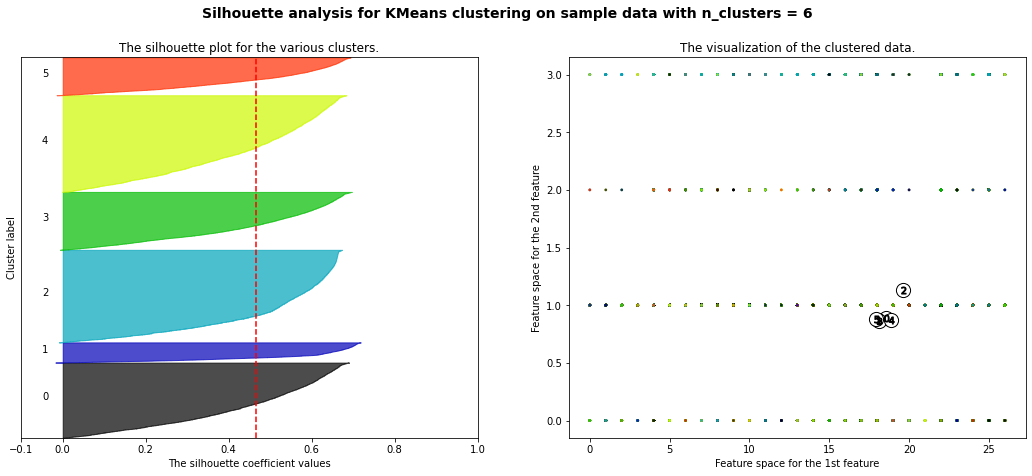

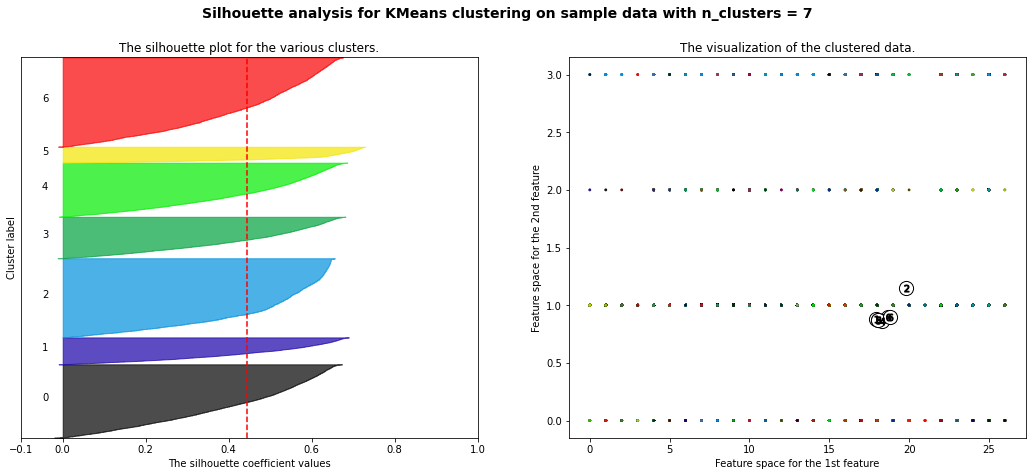

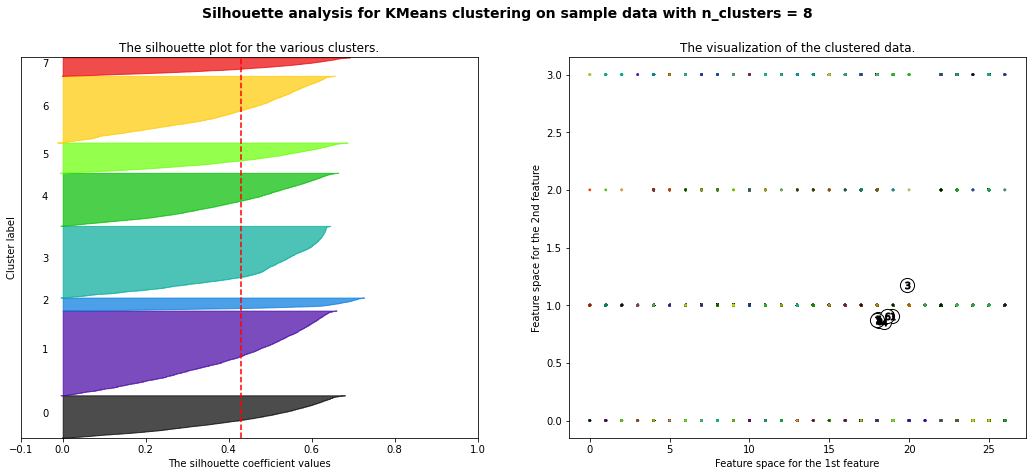

In [ ]:
# find cluster based on silhoutte score
silhoutte_analysis(df_cluster,list(range(2,9)))